## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [ ]:
import numpy as np    #Biblioteca matemática
import pandas as pd   #Biblioteca para manipulação de dados
import matplotlib.pyplot as plt #Biblioteca gráfica
import tensorflow as tf #Biblioteca para machine learning
import sklearn.preprocessing #Biblioteca para machine learning
import random
import keras
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from keras.layers import Dense,Dropout,SimpleRNN,LSTM #Biblioteca para deep learning
from keras.models import Sequential

#tf.keras.utils.set_random_seed(1234)

# Mecanismo de Atenção
from keras.layers import Layer
import keras.backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Busca dos dados de pré-treinamento no drive (AEP DATASET)

path1 = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Kaggle/AEP_hourly - AEP_hourly.csv'
dados = pd.read_csv(path1,sep=',', encoding='iso-8859-1') #, index_col='Data', parse_dates=['Data'])
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)


In [ ]:
#Busca dos dados de treinamento no drive (DUAS UNAS DATASET)

path2 = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Compesa/EEAB DUAS UNAS/EEAB DUAS UNAS.csv'
dados2 = pd.read_csv(path2,sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Dados de Pré-treinamento (AEP)**


In [ ]:
dados = dados.sort_values(by='DateTime')
dados = dados.set_index('DateTime')
dados

In [ ]:
import plotly.express as px #Biblioteca gráfica

In [ ]:
hist1 = px.histogram(dados, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout (width = 800, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

In [ ]:
import seaborn as sns #Biblioteca gráfica e estatística

In [ ]:
sns.histplot(dados, x='kWh fornecido', bins=100, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [ ]:
px.box(dados, y='kWh fornecido')  #Boxplot - Visualização dos outliers

In [ ]:
dados['kWh fornecido'].astype(float)
dados.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

## **Dados de Treinamento (Duas Unas)**

In [ ]:
#Ajustar o tipo do dado 'hora'
dados2['Hora'].astype(int)
dados2['Hora'].dtypes

In [ ]:
#Função para inserir dígitos '0' nas horas
def horas(number):
    if number == 24:
      hora = '00:00'
    else:
      if number < 10:
        hora = '0'+str(number)+':00'
      else:
        hora = str(number)[:]+':00'
    return hora

In [ ]:
#Inserir dígitos '0' nas horas
for i in range(len(dados2)):
  dados2['Hora'].iloc[i] = horas(dados2['Hora'].iloc[i])

In [ ]:
#Correção da data na hora 00:00h
for i in range(len(dados2)-1):
  if (dados2['Hora'].iloc[i] == '00:00'):
    dados2['Data'].iloc[i] = dados2['Data'].iloc[i+1]

In [ ]:
#Retirada da última linha de dado - data errada
dados2 = dados2[:len(dados2)-1]
dados2.tail()

In [ ]:
#Transformação da matriz de dados em dataframe, aglutinação das colunas de 'data' e 'hora' em uma só, configuração do dado 'datetime', ordenação das linhas por 'datetime', transformação da coluna 'Datetime' em índice do dataframe e exclusão das colunas 'data' e 'hora'
dados2 = pd.DataFrame(dados2, columns =['Data','Hora','kWh fornecido'])
dados2['DateTime'] = dados2['Data'] + ' ' + dados2['Hora']
dados2['DateTime'] = pd.to_datetime(dados2['DateTime'], format='%d/%m/%Y %H:%M') # Use the correct format string
dados2 = dados2.sort_values(by='DateTime')
dados2 = dados2.set_index('DateTime')
dados2 = dados2.drop(['Data', 'Hora'], axis=1)
dados2.tail()

In [ ]:
#CÉLULA APENAS PARA DADOS DIÁRIOS
# dados2 = pd.DataFrame(dados2, columns =['Data','kWh fornecido'])
# dados2 = dados2.sort_values(by='Data')
# dados2 = dados2.set_index('Data')
# dados2['kWh fornecido'].astype(float)
# dados2['kWh fornecido'].dtypes

In [ ]:
#Histograma dos dados
hist1 = px.histogram(dados2, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout (width = 600, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

In [ ]:
#Curva de tendência dos dados
sns.histplot(dados2, x='kWh fornecido', bins=30, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [ ]:
#Boxplot - Visualização dos outliers
px.box(dados2, y='kWh fornecido')

In [ ]:
dados2['kWh fornecido'].astype(float)
dados2.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

In [ ]:
dados2 = dados2.iloc[119:]
dados2.head()

In [ ]:
somatorio = 0
for i in range(len(dados2)-1):
  if dados2['kWh fornecido'].iloc[i] < 750:
    for j in range(24,0,-1):
      somatorio += dados2['kWh fornecido'].iloc[i-j]
      #print(dados2['kWh fornecido'].iloc[i]
    dados2['kWh fornecido'].iloc[i] = somatorio/24
    somatorio = 0

In [ ]:
dados2['kWh fornecido'].astype(float)
dados2.plot(figsize=(30,6),legend=True, color = 'red')  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')
plt.yticks(np.arange(0,1000,step=50))
plt.ylim((750,1000))
plt.show()

## **Normalização dos dados**




In [ ]:
# Padronização MinMax
#def padronizacao(dados):
#  min = dados.min().iloc[0]
#  max = dados.max().iloc[0]
#  print(min)
#  print(max)
#  de_padr = []
#  for i in range(len(dados)-1):
#    valor = dados.iloc[i,0]
#    valor = valor - min
#    valor = valor/[max-min]
#    de_padr.append(valor)

#  return pd.DataFrame(de_padr)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def MinMax(dados):
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(dados)
  return pd.DataFrame(scaled_data)


In [ ]:
#Estatística dos dados AEP
dados.describe()

In [ ]:
df_AEP = MinMax(dados)

In [ ]:
def plot_dadospadronizados(dados):
  dados.plot(figsize=(30,6),color = 'red',legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

  plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')
  plt.yticks(np.arange(0,1.1,step=0.1))
  plt.show()

In [ ]:
plot_dadospadronizados(df_AEP)

In [ ]:
#Estatística dados Duas Unas
dados2.describe()

In [ ]:
df_DU = MinMax(dados2)

In [ ]:
df_DU.describe()

In [ ]:
plot_dadospadronizados(df_DU)

## **Treino e Teste**

In [ ]:
class attention(Layer):
    #def __init__(self,**kwargs):
    #   self.return_sequences = return_sequences
    #   super(attention,self).__init__(**kwargs)

    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

# PESOS E BIAS
    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal") # Pesos
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros") # Bias
        super(attention, self).build(input_shape)

# VETOR DE CONTEXTO
    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1) # Produto escalar entre pesos e entradas e soma com bias
        at=K.softmax(et) # Normalização para que o somatório dos pesos seja = 1
        at=K.expand_dims(at,axis=-1)
        output=x*at # Saída (peso-at * entrada-x)
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
def load_data(stock, seq_len,out_steps, perc_train, perc_test):  # stock == de_df     seq_len == 20
    train = perc_train
    test = perc_test
    y_plot = []
    X_train = []
    y_train = []   #  20       145366
    for i in range(seq_len, len(stock)- out_steps + 1):
        X_train.append(stock.iloc[i-seq_len : i, 0])   # Cria, em cada posição de X_train, um vetor coluna [20,1] com as entradas de cada sequência
        y_train.append(stock.iloc[i:i+out_steps, 0])   # Armazena, em cada posição de Y_train, o valor de saída (valor seguinte) correspondente à saída esperada
        y_plot.append(stock.iloc[i,0])
                                           # quando o vetor coluna [20,1] de mesma posição em X_train for adicionado à entrada
    #1 last 25346 data are going to be used in test
    X_test = X_train[round(train*len(stock)):len(stock)]   # [120000:] # Os vetores colunas das posições 120.000 - final serão utilizados como entrada na etapa de teste
    y_test = y_train[round(train*len(stock)):len(stock)]   # [120000:] # Os valores nas posições 120.000 - final serão utilizados como saída na etapa de teste
    y_plot = y_plot[round(train*len(stock)):len(stock)]

    #2 first 120000 data are going to be used in training
    X_train = X_train[:round(train*len(stock))]  # [:120000] # Os vetores colunas das posições 0 - 119.999 serão utilizados como entrada na etapa de treino
    y_train = y_train[:round(train*len(stock))]  # [:120000] # Os valores nas posições 0 - 119.999 serão utilizados como saída na etapa de treino

    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_plot = np.array(y_plot)

    #4 reshape data to input into RNN models
                                 # 120000
    X_train = np.reshape(X_train, (round(train*len(stock)), seq_len, 1))   #Reorganiza X_train e a transforma numa matriz [120000,20,1], sendo uma sequência por linha

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))   #Reorganiza X_teste e a transforma numa matriz [25346,20,1], sendo uma sequência por linha

    return [X_train, y_train, X_test, y_test, y_plot]


In [ ]:
seq_len = 20 #Comprimento da sequência       ????????
out_steps = 1 #Comprimento do vetor de saída

In [ ]:
#Train e Test Data dados AEP

X_train_A, y_train_A, X_test_A, y_test_A, y_plot_A = load_data(df_AEP, seq_len, out_steps, 0.7, 0.3)   #Chama a função load_data

print('X_train.shape = ',X_train_A.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
print('y_train.shape = ', y_train_A.shape)
print('X_test.shape = ', X_test_A.shape)
print('y_test.shape = ',y_test_A.shape)
print('y_plot.shape = ',y_plot_A.shape)

In [ ]:
X_train_U, y_train_U, X_test_U, y_test_U, y_plot_U = load_data(df_DU, seq_len, out_steps, 0.7, 0.3)   #Chama a função load_data

print('X_train.shape = ',X_train_U.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
print('y_train.shape = ', y_train_U.shape)
print('X_test.shape = ', X_test_U.shape)
print('y_test.shape = ',y_test_U.shape)
print('y_plot.shape = ',y_plot_U.shape)

In [ ]:
import numpy as np

# Verificando se nos dados de entrada e saída há NaN ou infinitos
print(np.any(np.isnan(X_train_U)), np.any(np.isnan(y_train_U)))
print(np.any(np.isinf(X_train_U)), np.any(np.isinf(y_train_U)))

print(np.any(np.isnan(X_test_U)), np.any(np.isnan(y_test_U)))
print(np.any(np.isinf(X_test_U)), np.any(np.isinf(y_test_U)))

In [ ]:
#   ETAPA DE MODELAGEM DA REDE LSTM

# Busca de hiperparâmetros (random search)

lstm_model = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

#Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
lstm_model.add(LSTM(100,return_sequences=True, input_shape=(seq_len,1))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
lstm_model.add(Dropout(0.3)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

lstm_model.add(LSTM(100,return_sequences=True))
lstm_model.add(Dropout(0.3))

lstm_model.add(LSTM(100,return_sequences=False)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
lstm_model.add(Dropout(0.3))

# ATTENTION #
#lstm_model.add(attention(return_sequences=False))

lstm_model.add(Dense(1)) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

lstm_model.summary() # Printa um sumário da rede

In [ ]:
from tensorflow.keras import backend as K

def rmse(y_true, y_pred):
    mse = K.mean(K.square(y_pred - y_true), axis=-1)
    return K.sqrt(mse)

In [ ]:
#    ETAPA DE TREINAMENTO
#   Configuração do modelo para treinamento
def treinamento(modelo, X_treino,Y_treino,l_r,batch,paciencia):

    modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=l_r),loss="MSE")
    # optmizer - função que define como os pesos da rede neural são atualizados
    # adam - método estocástico do gradiente descendente
    # loss - função de calcula a diferença entre os dados de teste e os dados de validação
    # MSE - erro quadrático médio
    # Learning rate - PESQUISAR

    # callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    # = EarlyStopping(monitor='val_loss', verbose=1), patience=50
                                               #batch_size=500                                                                                             #patience=15
    history = modelo.fit(X_treino, Y_treino, epochs=100000, batch_size=batch, validation_split=0.3, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=paciencia))   #Treinamento do modelo
    #             (Entrada; saída; ciclos de treinamento com todos os dados; tamanho do lote (1000) que, ao dividir o tamanho da (120.000),
    #              define a quantidade de etapas por ciclo. Após cada etapa, os pesos são atualizados para a próxima etapa.

    # Plotar as perdas de treinamento e validação
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.show()

In [ ]:
def testes(modelo,X_test,y_test):

  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_percentage_error

  lstm_predictions_testes = modelo.predict(X_test)  # Gera as previsões de saída para as entradas X_test

  lstm_predictions_testes = np.array(lstm_predictions_testes)
  y_test = np.array(y_test)


#lstm_predictions_valor_real = normal.inverse_transform(lstm_predictions)

#print("Valor real previsto (kWh): ",lstm_predictions_valor_real)

  lstm_score = r2_score(y_test, lstm_predictions_testes)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
  print("R^2 Score of LSTM model = ",lstm_score)
  print(" ")

  lstm_score2 = mean_absolute_error(y_test, lstm_predictions_testes)
  print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
  print(" ")

  lstm_score3 = mean_squared_error(y_test, lstm_predictions_testes)
  print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
  print(" ")

  #lstm_score4 = mean_absolute_percentage_error(y_test, lstm_predictions_testes)
  #print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

  mape = np.mean(np.abs((y_test - lstm_predictions_testes) / y_test)) * 100

  print(f"MAPE(Erro percentual médio absoluto) Score of LSTM model = {mape}%")

#lstm_score5 = cross_val_score(lstm_model, X_test, y_test, cv=3, scoring='neg_mean_squared_error')
#print("MSE(Erro quadrático médio) Score of LSTM model com cross-validation 3 = ",lstm_score5)
  return lstm_predictions_testes

In [ ]:
def plot_predictions_univar(test, predicted, title):
    plt.figure(figsize=(100,40))
    plt.grid(True)
    plt.yticks(np.arange(0,750,step=50))
    plt.plot(test, color='blue',label='Actual power consumption data') #Plota y_test
    plt.plot(predicted, alpha=0.7, color='red',label='Predicted power consumption data') #Plota Y previsto
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

In [ ]:
#Pré-treinamento com dados AEP
#treinamento(lstm_model,X_train_A,y_train_A,0.001,500,5)

In [ ]:
#pesos_treinamento1 = lstm_model.get_weights()
#pesos_LSTM1_t1 = lstm_model.get_layer(name='lstm').get_weights()
#pesos_LSTM2_t1 = lstm_model.get_layer(name='lstm_1').get_weights()
#pesos_LSTM3_t1 = lstm_model.get_layer(name='lstm_2').get_weights()

In [ ]:
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz',W=pesos_LSTM1_t1[0], U=pesos_LSTM1_t1[1], b=pesos_LSTM1_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz',W=pesos_LSTM2_t1[0], U=pesos_LSTM2_t1[1], b=pesos_LSTM2_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz',W=pesos_LSTM3_t1[0], U=pesos_LSTM3_t1[1], b=pesos_LSTM3_t1[2])

In [ ]:
#lstm_model.save('lstm_model_HOJE.keras')

In [ ]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE')

In [ ]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE.keras')

In [ ]:
#Testes com os dados AEP
#teste = testes(lstm_model,X_test_A,y_test_A)

In [ ]:
#Gráfico comparativo dos valores previstos e reais AEP
#plot_predictions_univar(y_test_A, teste,"Predições para os dados AEP")

In [ ]:
#pesos_LSTM1 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz')
#pesos_LSTM2 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz')
#pesos_LSTM3 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz')

In [ ]:
caminho_LSTM1 = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz'
caminho_LSTM2 = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz'
caminho_LSTM3 = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz'

In [ ]:
# Carregar os pesos salvos
def carregar_pesos(arquivo_pesos_camada):

  with np.load(arquivo_pesos_camada) as data:
      W = data['W']
      U = data['U']
      b = data['b']
      # Os pesos podem ter mais de um conjunto, então você deve garantir que a ordem e o número estejam corretos.
      loaded_weights = [W, U, b]
  return loaded_weights

In [ ]:
pesos_LSTM1_t1_carregado = carregar_pesos(caminho_LSTM1)
pesos_LSTM2_t1_carregado = carregar_pesos(caminho_LSTM2)
pesos_LSTM3_t1_carregado = carregar_pesos(caminho_LSTM3)

In [ ]:
def comparar_pesos(lista1, lista2):
  """
  Compares two lists of NumPy arrays for equality.

  Args:
    lista1: The first list of NumPy arrays.
    lista2: The second list of NumPy arrays.

  Returns:
    True if all corresponding arrays in the lists are equal, False otherwise.
  """
  if len(lista1) != len(lista2):
    return False
  for i in range(len(lista1)):
    if not np.array_equal(lista1[i], lista2[i]):
      return False
  return True

# # Now you can compare the lists like this:
# sao_iguais = comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado)
# print(sao_iguais)  # This will print True or False

In [ ]:
#print(comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado))
#print(comparar_pesos(pesos_LSTM2_t1, pesos_LSTM2_t1_carregado))
#print(comparar_pesos(pesos_LSTM3_t1, pesos_LSTM3_t1_carregado))

In [ ]:
#   ETAPA DE MODELAGEM DA REDE LSTM
from tensorflow.keras.initializers import GlorotUniform    #Inicializador de pesos
from keras.regularizers import l1_l2

lstm_model_treinado = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

#Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
lstm_model_treinado.add(LSTM(100,return_sequences=True, input_shape=(seq_len,1),name='lstm_1',activation = 'tanh')) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
lstm_model_treinado.add(Dropout(0.2)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

lstm_model_treinado.add(LSTM(100,return_sequences=True,name='lstm_2',activation = 'tanh')) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
lstm_model_treinado.add(Dropout(0.2))

lstm_model_treinado.add(LSTM(100,return_sequences=False,
                             kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                             recurrent_initializer=GlorotUniform(),  # Inicializador para os pesos recorrentes
                             bias_initializer=GlorotUniform(),name='lstm_3',activation = 'tanh'))  # Inicializador para os biases)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
                             #kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
lstm_model_treinado.add(Dropout(0.2))

# ATTENTION #
#lstm_model.add(attention(return_sequences=False))

lstm_model_treinado.add(Dense(out_steps,
                        kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                        bias_initializer=GlorotUniform(),  # Inicializador para os biases
                        name='dense_layer')) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

lstm_model_treinado.summary() # Printa um sumário da rede

In [ ]:
  # Aplicar os pesos carregados à camada LSTM
lstm_model_treinado.get_layer(name='lstm_1').set_weights(pesos_LSTM1_t1_carregado)
lstm_model_treinado.get_layer(name='lstm_2').set_weights(pesos_LSTM2_t1_carregado)

In [ ]:
# Congela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes

#lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
lstm_model_treinado.layers[0].trainable = False
lstm_model_treinado.layers[1].trainable = False
lstm_model_treinado.layers[2].trainable = False
lstm_model_treinado.layers[3].trainable = False
print(lstm_model_treinado.layers[0].trainable)
print(lstm_model_treinado.layers[0].trainable)

In [ ]:
#Treinamento com dados Duas Unas - Camadas Congeladas
treinamento(lstm_model_treinado,X_train_U,y_train_U,0.0001,200,2)

In [ ]:
# Congela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes

#lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
lstm_model_treinado.layers[0].trainable = True
lstm_model_treinado.layers[1].trainable = True
lstm_model_treinado.layers[2].trainable = True
lstm_model_treinado.layers[3].trainable = True
lstm_model_treinado.layers[2].trainable

In [ ]:
lstm_model_final = lstm_model_treinado

In [ ]:
#Treinamento com dados Duas Unas - Camadas Descongeladas
treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,2)

In [ ]:
#Testes com os dados Duas Unas
teste2 = testes(lstm_model_final, X_test_U,y_test_U)

In [ ]:
#Gráfico comparativo dos valores previstos e reais Duas Unas
plot_predictions_univar(y_test_U, teste2,"Predições para os dados Duas Unas")

In [ ]:
def sequencia_completa(modelo,janela_entrada,janela_futuro,prediction):
    print(janela_entrada)
    for i in range(janela_futuro):
        print(janela_entrada[np.newaxis,:,:].shape)
        prediction.append(modelo.predict(janela_entrada[np.newaxis,:,:])[0,0]) #np.newaxis adiciona uma nova dimensão à janela_entrada, que se torna (1,n,1)
        print(prediction[-1])
        janela_entrada = janela_entrada[1:]
        janela_entrada = np.insert(janela_entrada, (janela_entrada.shape[0]), prediction[-1], axis=0)
        #print(janela[-1])
        print(janela_entrada)
    return prediction

In [ ]:
# prediction = []
# janela_futuro = 720
# prediction = sequencia_completa(lstm_model_final,X_test_U[0],janela_futuro,prediction)

In [ ]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth):
    plt.figure(figsize=(20, 4))
    #y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    #plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)
    #plt.yticks(np.arange(0,1000,step=50))

In [ ]:
#plot_multistep(X_test_U[0],prediction,y_plot_U[:janela_futuro])

In [ ]:
lstm_model_final.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/Duas Unas com filtro/lstm_model_treinado_etapa2(11_09_24).keras')

In [ ]:
from tensorflow.keras.models import load_model

# Caminho para o arquivo do modelo salvo no Google Drive
model_path = '/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/Duas Unas com filtro/lstm_model_treinado_etapa2(11_09_24).keras'

# Carregar o modelo
model = load_model(model_path)

# Verificar a arquitetura do modelo
model.summary()

In [ ]:
lstm_model_final.get_layer(name='lstm_1').get_weights()
model.get_layer(name='lstm_1').get_weights()
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_1').get_weights(), model.get_layer(name='lstm_1').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_2').get_weights(), model.get_layer(name='lstm_2').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_3').get_weights(), model.get_layer(name='lstm_3').get_weights()))

In [ ]:
X_test_U[0].shape

In [ ]:
prediction_multi_1 = []
janela = X_test_U[0]
janela_futuro_1 = 240 #2160
#print(janela.shape)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)
janela = janela[1:]
janela = np.insert(janela, (janela.shape[0]), model.predict(janela[np.newaxis,:,:])[0,0], axis=0)
prediction_multi_1.append(model.predict(janela[np.newaxis,:,:])[0,0])
print(prediction_multi_1)

In [ ]:
prediction_multi_1 = []
janela = X_test_U[0]
janela_futuro_1 = 20 #2160

In [ ]:
sequencia_completa(model,janela,janela_futuro_1,prediction_multi_1)

In [ ]:
plot_multistep(X_test_U[0],prediction_multi_1,y_plot_U[:janela_futuro_1])

In [ ]:
lstm_score = r2_score(y_plot_U[:janela_futuro_1], prediction_multi_1)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
print("R^2 Score of LSTM model = ",lstm_score)
print(" ")

lstm_score2 = mean_absolute_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
print(" ")

lstm_score3 = mean_squared_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
print(" ")

lstm_score4 = mean_absolute_percentage_error(y_plot_U[:janela_futuro_1], prediction_multi_1)
print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

In [ ]:
###################################################################################################

In [ ]:
def incremento(X_train_U,y_train_U,y_test_U,janela_futuro):

  X_train_U_novo = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar
  X_test_U_2d = X_test_U[:janela_futuro].reshape(janela_futuro, -1) #reshape em 2-dimension para poder concatenar

  X_train_U_novo = pd.concat([pd.DataFrame(X_train_U_novo), pd.DataFrame(X_test_U_2d[:janela_futuro])], axis=0) #inicialmente X_test_U era transposto .T
  y_train_U_novo = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[:janela_futuro])], axis=0)

  X_train_U_novo = np.reshape(X_train_U_novo, (X_train_U_novo.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

  print(X_train_U_novo.shape)
  print(y_train_U_novo.shape)

  print(np.any(np.isnan(X_train_U_novo)), np.any(np.isnan(y_train_U_novo)))
  print(np.any(np.isinf(X_train_U_novo)), np.any(np.isinf(y_train_U_novo)))

  return X_train_U_novo, y_train_U_novo



In [ ]:
X_train_U.shape

In [ ]:
prediction_multi_2 = []
janela_2 = X_test_U[1080]
janela_futuro_2 = 2160

X_train_n, y_train_n = incremento(X_train_U,y_train_U,y_test_U,janela_futuro_1)

treinamento(model,X_train_n,y_train_n,0.0001,200,20)

sequencia_completa(model,janela_2,janela_futuro_1,prediction_multi_2)

(5161, 20, 1)
(5161, 1)
False False
False False
Epoch 1/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 434ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - loss: 8.8122e-04 - val_loss: 9.3280e-04
Epoch 3/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - loss: 0.0010 - val_loss: 8.9757e-04
Epoch 4/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step - loss: 9.0219e-04 - val_loss: 8.8366e-04
Epoch 5/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - loss: 0.0011 - val_loss: 9.3365e-04
Epoch 6/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 455ms/step - loss: 9.2927e-04 - val_loss: 9.6166e-04
Epoch 7/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - loss: 8.3626e-04 - val_loss: 8.8297e-04
Epoch 8/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - loss: 8.3980e-04 - val_loss: 9.3232e-04
Epoch 9/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 529ms/step - loss: 8.2061e-04 - val_loss: 9.4864e-04
Epoch 10/100000
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 334ms/step - loss: 9.6485e-04 - va

ValueError: x and y must have same first dimension, but have shapes (20,) and (2140,)

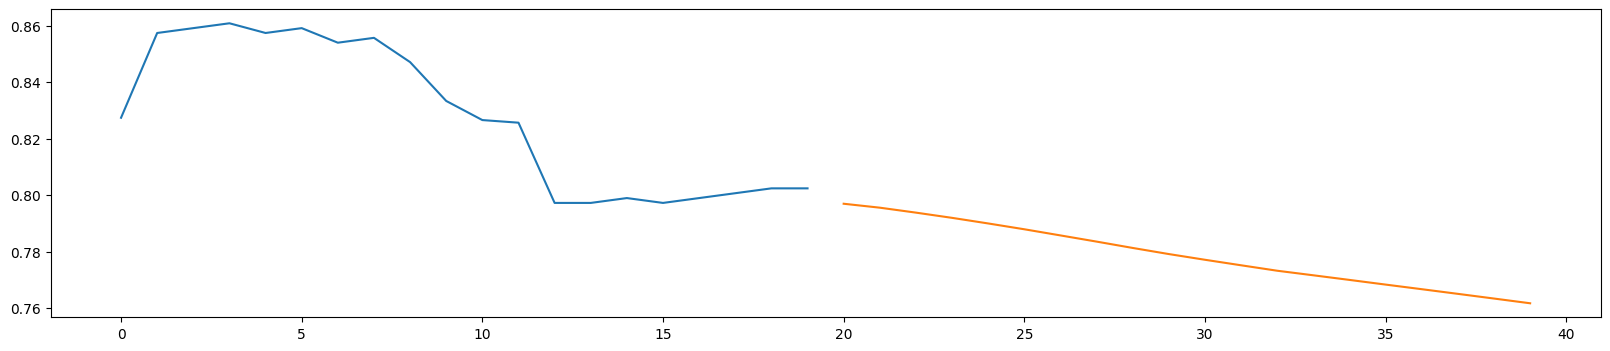

In [ ]:
plot_multistep(X_test_U[1080],prediction_multi_2,y_plot_U[janela_futuro_1:janela_futuro_2])

In [ ]:
lstm_score = r2_score(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
print("R^2 Score of LSTM model = ",lstm_score)
print(" ")

lstm_score2 = mean_absolute_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
print(" ")

lstm_score3 = mean_squared_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
print(" ")

lstm_score4 = mean_absolute_percentage_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

In [ ]:
###################################################################################################

In [ ]:
# LSTM MULTISTEP - Implementação 2 (modelo Saulo)

# prediction_multi = []
# janela = X_test_U[0]
# janela_futuro = 24

# for j in range((int(X_test_U.shape[0]/janela_futuro)-80)):
#     if j == 0:
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)
#     else:

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar

#         X_train_U = pd.concat([pd.DataFrame(X_train_U), pd.DataFrame(X_test_U[j-1].T)], axis=0)
#         y_train_U = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[j-1:j-1+seq_len])], axis=0)

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

#         treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,15)
        #treinamento(X_train,y_train)
#         janela = X_test_U[j]
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)